# **Group Project Final Report (Group 11)**

## **Introduction**

#### **Background Information**

As digital payments boomed in recent years with the rapid development of the Internet, people enjoy the fast and convenient transaction service but also face an increasing number of cyber criminals alongside. 
The Data Breach Index announced that over five million records are being stolen on a daily basis, which indicates that fraud is very common in our daily life. 
However, detection of fraud is challenging since trillions of card transactions happen per day. 

#### **Research Question**

Using our classification model, can we predict fraudulent transaction using **<font color=red> distance from home and ratio to median purchase price</font>** variables to prevent future crime?

#### **Dataset description**

We will be using a dataset called Credit Card Fraud by Dhanush Narayanan from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud. The dataset is in a “Comma Seperated Value” (csv) file format and contains eight columns, which are: 
- **distance_from_home** = the distance from home where the transaction happened
- **distance_from_last_transaction** = the distance from last transaction happened.
- **ratio_to_median_purchase_price**  =  Ratio of purchased price transaction to median purchase price.
- **repeat_retailer** = whether the transaction happened from same retailer or not
- **used_chip** = whether the transaction is through chip (credit card) or not
- **used_pin_number** = whether the transaction happened by using PIN number or not
- **online_order** = whether the transaction is an online order or not
- **fraud** = whether the transaction is fraudulent or not

Our target variable, which is the variable that we are predicting, is fraud and the predictors that we will be using are `distance_from_home` and `ratio_to_median_purchase_price`.

## **Methods & Results**

To conduct our analysis, we will load the dataset into R, find the correlation between fraud and other variables, and clean and wrangle the dataset into a tidy format. We will use `fraud` as our target variable and our predictors are `ratio_to_median_purchase_price` and `distance_from_home` as they have the highest correlation to fraud. We will then determine the value of k that has the highest estimated accuracy by cross validation and train our model using the best value of k. Lastly, we would use our classifier to make predictions on the testing dataset and some new observations, and evaluate its accuracy. The final step is to visualize our analysis by creating a colored prediction map where we plot `ratio_to_median_purchase_price` VS `distance_from_home`, separate types of transactions using different colors, and represent the predictions using coloured areas. We will also visualize how the predictions compares with the true labels of the testing dataset.

#### **I. Preprocessing Data**

First of all, we would load the packages that are required to perform the analysis of our dataset.

In [23]:
#Load packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(rvest)
library(cowplot)

After loading the required packages, we will read our dataset into R using read_csv and assigned it to an object called `original_data`.

In [24]:
#Read the dataset into R
URL <- "https://raw.githubusercontent.com/chohyeonkim/DSCI-100/main/data/card_transdata.csv"
original_data <- read_csv(URL)

#Show the first ten rows of the dataset
paste("Table 1: Credit Card Fraud Dataset (from Kaggle)")
head(original_data, 10)

Parsed with column specification:
cols(
  distance_from_home = col_double(),
  distance_from_last_transaction = col_double(),
  ratio_to_median_purchase_price = col_double(),
  repeat_retailer = col_double(),
  used_chip = col_double(),
  used_pin_number = col_double(),
  online_order = col_double(),
  fraud = col_double()
)



[1] "Table 1: Credit Card Fraud Dataset (from Kaggle)"

distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57.8778566,0.3111400,1.94593998,1,1,0,0,0
10.8299427,0.1755915,1.29421881,1,0,0,0,0
5.0910795,0.8051526,0.42771456,1,0,0,1,0
2.2475643,5.6000435,0.36266258,1,1,0,1,0
44.1909360,0.5664863,2.22276730,1,1,0,1,0
5.5864077,13.2610733,0.06476847,1,0,0,0,0
3.7240191,0.9568379,0.27846494,1,0,0,1,0
4.8482466,0.3207354,1.27304952,1,0,1,0,0
0.8766323,2.5036089,1.51699932,0,0,0,0,0


 ##### Table 1. An overall view of the credit card fraud dataset, showing the first 10 rows of observations and all the variables it contains in the column

Now, we will use the `cor()` function to find the correlation of each variable in the dataset with our target variable (`fraud`). The closer the correlation value of a variable is to 1, the stronger the correlation of the variable to our target variable and so, we would choose that variable as our predictors.

In [25]:
#Finding the correlation between fraud and other variables
paste("Table 2: Correlation Values of All Variables in the Credit Card Fraud Dataset")
cor(original_data)

[1] "Table 2: Correlation Values of All Variables in the Credit Card Fraud Dataset"

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.0000000000,0.0001928283,-0.0013741792,0.1431242563,-0.0006970671,-0.0016221862,-0.0013011283,0.18757078
distance_from_last_transaction,0.0001928283,1.0000000000,0.0010125256,-0.0009282325,0.0020548558,-0.0008986436,0.0001408932,0.09191691
ratio_to_median_purchase_price,-0.0013741792,0.0010125256,1.0000000000,0.0013738219,0.0005865787,0.0009422046,-0.0003298145,0.46230472
repeat_retailer,0.1431242563,-0.0009282325,0.0013738219,1.0000000000,-0.0013447766,-0.0004173906,-0.0005322431,-0.00135745
used_chip,-0.0006970671,0.0020548558,0.0005865787,-0.0013447766,1.0000000000,-0.0013931882,-0.0002187927,-0.06097460
used_pin_number,-0.0016221862,-0.0008986436,0.0009422046,-0.0004173906,-0.0013931882,1.0000000000,-0.0002909938,-0.10029254
online_order,-0.0013011283,0.0001408932,-0.0003298145,-0.0005322431,-0.0002187927,-0.0002909938,1.0000000000,0.19197252
fraud,0.1875707828,0.0919169123,0.4623047223,-0.0013574501,-0.0609745976,-0.1002925373,0.1919725224,1.00000000


From the loaded table, we see that the last row of the table correspond to the correlation of each variable in the dataset with `fraud`. As observed, the variables `distance_from_home`, `ratio_to_median_purchase_price`, and `online_order` are the top three variables that shows correlation with `fraud`. However, since online order is categorical data, we would not use online order to make our classification model. Thus, the predictor variables we will use are `ratio_to_median_purchase_price` and `distance_from_home`. 

The next step is to clean our dataset into a tidy format. Columns `repeat_retailer`, `used_chip`, `used_pin_number`, `online_order`, and `fraud` contain the binary values `0` and `1`, so we change these values into a logical statement (`1 -> TRUE` and `0 -> FALSE`) and then as a factor.

In [26]:
data <- original_data %>%
        #Converts columns from numerical to logical
            mutate(repeat_retailer = as.logical(repeat_retailer)) %>%
            mutate(used_chip = as.logical(used_chip)) %>%
            mutate(used_pin_number = as.logical(used_pin_number)) %>%
            mutate(online_order = as.logical(online_order)) %>%
            mutate(fraud = as.logical(fraud))%>%
        #Converts data types into factor
            mutate(repeat_retailer = as_factor(repeat_retailer)) %>%
            mutate(used_chip = as_factor(used_chip)) %>%
            mutate(used_pin_number = as_factor(used_pin_number)) %>%
            mutate(fraud = as_factor(fraud)) 

#Show the first ten rows of the dataset
paste("Table 3: Modified Credit Card Fraud Dataset")
head(data, 10)

[1] "Table 3: Modified Credit Card Fraud Dataset"

distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<lgl>,<fct>
57.8778566,0.3111400,1.94593998,TRUE,TRUE,FALSE,FALSE,FALSE
10.8299427,0.1755915,1.29421881,TRUE,FALSE,FALSE,FALSE,FALSE
5.0910795,0.8051526,0.42771456,TRUE,FALSE,FALSE,TRUE,FALSE
2.2475643,5.6000435,0.36266258,TRUE,TRUE,FALSE,TRUE,FALSE
44.1909360,0.5664863,2.22276730,TRUE,TRUE,FALSE,TRUE,FALSE
5.5864077,13.2610733,0.06476847,TRUE,FALSE,FALSE,FALSE,FALSE
3.7240191,0.9568379,0.27846494,TRUE,FALSE,FALSE,TRUE,FALSE
4.8482466,0.3207354,1.27304952,TRUE,FALSE,TRUE,FALSE,FALSE
0.8766323,2.5036089,1.51699932,FALSE,FALSE,FALSE,FALSE,FALSE


##### Table 3. This is the table after we have wrangled our data and turned numerical values into logical values and mutate the character into factors.


We will only be selecting for the columns that will function as our target variable (`fraud`) and predictors (`distance_from_home` and `ratio_to_median_purchase_price`) in our classification model. We will assign our tidy dataset into an object called `card_data` and show the proportion of non-fraudulent and fraudulent transactions.

In [27]:
#Selecting for the columns that will become the target variable and predictors
card_data <- data %>%
              select(distance_from_home, ratio_to_median_purchase_price, fraud)

#Show the first ten rows of the tidy dataset
paste("Table 4: Tidy Credit Card Fraud Dataset")
head(card_data, 10)

#Show the number of rows of the tidy dataset
paste("The Number of Rows of The Tidy  Credit Card Fraud Dataset")
nrow(card_data)

[1] "Table 4: Tidy Credit Card Fraud Dataset"

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
57.8778566,1.94593998,FALSE
10.8299427,1.29421881,FALSE
5.0910795,0.42771456,FALSE
2.2475643,0.36266258,FALSE
44.1909360,2.22276730,FALSE
5.5864077,0.06476847,FALSE
3.7240191,0.27846494,FALSE
4.8482466,1.27304952,FALSE
0.8766323,1.51699932,FALSE


[1] "The Number of Rows of The Tidy  Credit Card Fraud Dataset"

[1] 1000000

##### Table 4. The table selects our two predictor data (*distance_from_home and ratio_to_median_purchase_price*) that have the highest correlation and target variable. 


In [28]:
#Compute the proportions of non-fraudulent and fraudulent transactions
percentage_fraud <- card_data %>%
                    group_by(fraud) %>%
                    summarize(n = n()) %>%
                    mutate(percent = 100*n/nrow(data))
paste("Table 5: Proportions of Fraud and Non-Fraud Transactions in The Tidy Credit Card Fraud Dataset")
percentage_fraud

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table 5: Proportions of Fraud and Non-Fraud Transactions in The Tidy Credit Card Fraud Dataset"

fraud,n,percent
<fct>,<int>,<dbl>
FALSE,912597,91.2597
TRUE,87403,8.7403


##### Table 5. The proportion where *n* shows the data point that is true and false for fraudulent transactions and *percent* shows percentage proportions of true and false



Here, we visualize the relationship between our target variable and predictors.

Warning message:
“Removed 32 rows containing missing values (geom_point).”


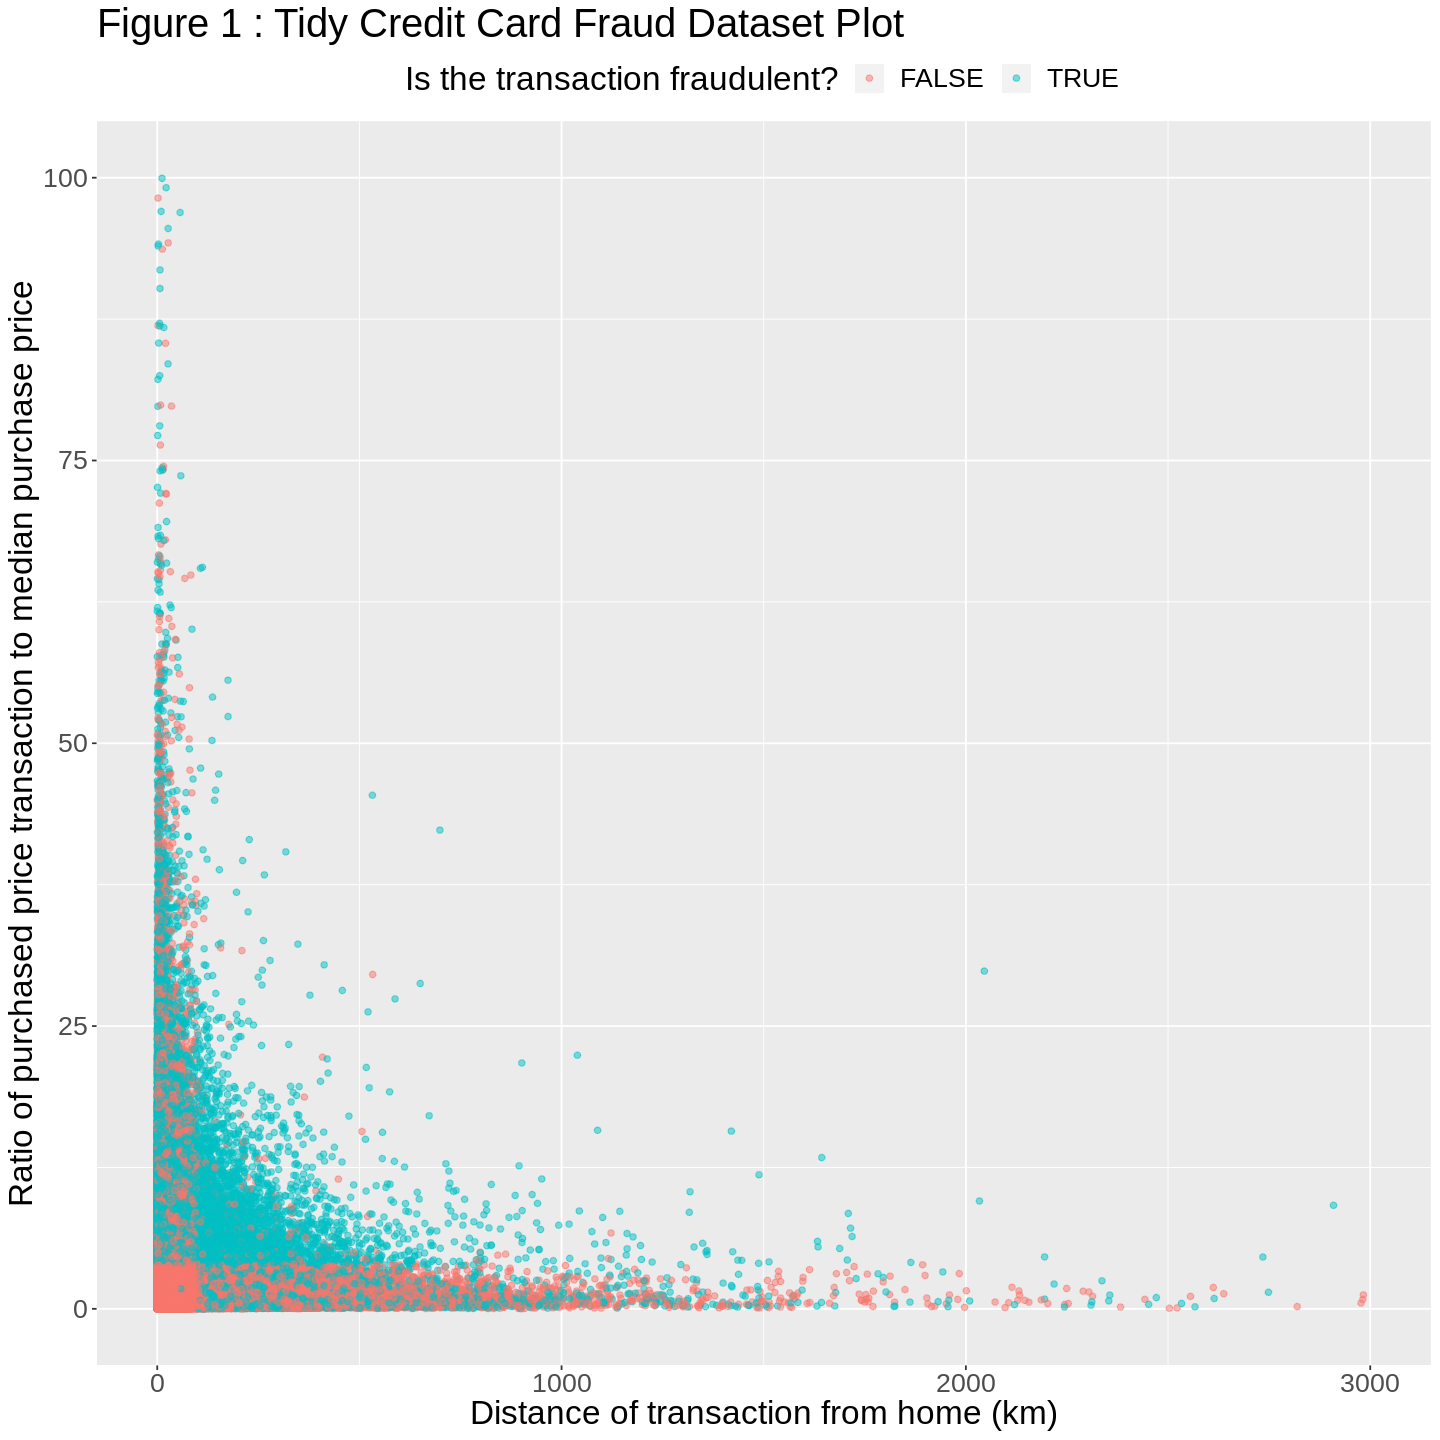

In [29]:
options(repr.plot.width = 12, repr.plot.height = 12)
card_data_plot <- card_data %>%
                  ggplot(aes(x = distance_from_home, y = ratio_to_median_purchase_price, colour = fraud)) + 
                  geom_point(alpha = 0.5) +
                  labs(x = "Distance of transaction from home (km)",
                       y = "Ratio of purchased price transaction to median purchase price",
                  colour = "Is the transaction fraudulent?") +
                  theme(text = element_text(size=20), legend.position = "top") +
                  ggtitle("Figure 1 : Tidy Credit Card Fraud Dataset Plot") +
                  scale_y_continuous(limits = c(0, 100)) +
                  scale_x_continuous(limits = c(0, 3000))
card_data_plot

##### Figure 1. Scatter plot showing the ratio of purchased price transaction to median purchase price (y-axis) based on distance of transaction location from home (x-axis). Fraudulent transactions are shown in blue and non-fraudulent  transactions are shown in red.

As we can see from the porportions, there are much more non-fraudulent transactions (91%) compared to fraudulent transactions (9%). Therefore, we use the `step_upsample()` function to balance the data and named the upsampled dataset as `upsampled_data`.

In [53]:
#Setting the seed
set.seed(1)

#Balancing the card_data
upsample_recipe <- recipe(fraud ~ ., data = card_data)%>%
                   step_upsample(fraud , over_ratio = 1, skip = FALSE) %>%
                   prep()

upsampled_data <- bake(upsample_recipe, card_data)

paste("Table 6: Upsampled Tidy Credit Card Fraud Dataset")
upsampled_data

[1] "Table 6: Upsampled Tidy Credit Card Fraud Dataset"

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
57.8778566,1.94593998,FALSE
10.8299427,1.29421881,FALSE
5.0910795,0.42771456,FALSE
2.2475643,0.36266258,FALSE
44.1909360,2.22276730,FALSE
5.5864077,0.06476847,FALSE
3.7240191,0.27846494,FALSE
4.8482466,1.27304952,FALSE
0.8766323,1.51699932,FALSE


In [31]:
#Setting the seed
set.seed(1)

#Compute the proportions of non-fraudulent and fraudulent transactions after being upsampled
upsampled_propotions <- upsampled_data %>%
                          group_by(fraud) %>%
                          summarize(n = n())
paste("Table 7: Proportions of Fraud and Non-Fraud Transactions in The Upsampled Tidy Dataset")
upsampled_propotions

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table 7: Proportions of Fraud and Non-Fraud Transactions in The Upsampled Tidy Dataset"

fraud,n
<fct>,<int>
FALSE,912597
TRUE,912597


After the upsampling process, we can see that the dataset have an equal number of fraudulent and non-fraudulent transactions, but the number of data points are too large. Therefore, we decided to sample 10,000 data from the upsampled dataset and use it as our primary dataset to build our model. We will name the sample dataset as `sample_card_data` 

In [32]:
#Setting the seed
set.seed(1)

#Creating our primary dataset containing 10,000 data sampled randomly
sample_card_data <- rep_sample_n(upsampled_data, size = 10000)

paste("Table 8: Primary Dataset")
head(sample_card_data, n = 10)

#Show the number of rows of the primary dataset
paste("The Number of Rows of The Primary Dataset")
nrow(sample_card_data)

[1] "Table 8: Primary Dataset"

replicate,distance_from_home,ratio_to_median_purchase_price,fraud
<int>,<dbl>,<dbl>,<fct>
1,31.8137974,5.1225528,TRUE
1,0.5929219,1.6732185,FALSE
1,38.7233943,0.8401030,FALSE
1,235.6822512,14.2647717,TRUE
1,12.5740794,1.4387046,FALSE
1,1.5276101,4.8696856,TRUE
1,17.7359157,0.6084818,FALSE
1,103.1251090,2.4083562,TRUE
1,0.7523377,4.6300780,TRUE


[1] "The Number of Rows of The Primary Dataset"

[1] 10000

#### **II. Cross Validation and Selecting The Parameter**

Now, we will be splitting our dataset (`sample_card_data`) where 70% of the dataset will be our training dataset (`card_train`) and the other 30% will be our testing dataset (`card_test`). We will also be setting the seed to ensure that we will get the same dataset every time we run the code.

In [33]:
#Setting the seed
set.seed(1)

# Spliting the dataset (sample_card_data) into training dataset and testing dataset
card_split <- initial_split(sample_card_data, prop = 0.7, strata = fraud)  
card_train <- training(card_split) 
card_test <- testing(card_split)

#Show the first ten rows of the training dataset
paste("Table 9: Training Dataset")
head(card_train, 10)

[1] "Table 9: Training Dataset"

replicate,distance_from_home,ratio_to_median_purchase_price,fraud
<int>,<dbl>,<dbl>,<fct>
1,31.8137974,5.1225528,TRUE
1,0.5929219,1.6732185,FALSE
1,38.7233943,0.8401030,FALSE
1,235.6822512,14.2647717,TRUE
1,12.5740794,1.4387046,FALSE
1,1.5276101,4.8696856,TRUE
1,17.7359157,0.6084818,FALSE
1,0.7523377,4.6300780,TRUE
1,16.0420350,3.9163059,FALSE


In [34]:
#Setting the seed
set.seed(1)

#Checking whether the balanced proportions of the transaction are maintained in the training dataset
prop_check <- card_train %>%
                group_by(fraud)%>%
                summarize(n = n())
paste("Table 10: Proportions of Fraud and Non-Fraud Transactions in The Primary Dataset")
prop_check

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Table 10: Proportions of Fraud and Non-Fraud Transactions in The Primary Dataset"

fraud,n
<fct>,<int>
FALSE,3472
TRUE,3528


Before performing cross-valdiation, we create a recipe (`card_recipe`) and model specification (`knn_tune`) for tuning k values.
We first create our recipe where we put `distance_form_home` and `ratio_to_median_purchase_price` as our predictors and fraud as the prediction variable.
Then we centre and scale our data since the values in our predictors are widely different in scale.
We will build our model specification by setting weight_func as *rectangular*, engine as *kknn*, and mode as *classification*.



In [35]:
#Setting the seed
set.seed(1)

#Create the recipe
card_recipe <- recipe(fraud ~ distance_from_home + ratio_to_median_purchase_price, data = card_train)%>%
                  step_scale(all_predictors())%>%
                  step_center(all_predictors())
card_recipe

#Create the model specification for tuning k values
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")
knn_tune

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We will perform a 5-fold cross validation and assign it to an object called `card_vfold`.  We will also make a tibble which contain the k values that will be used for tuning and combine the recipe and model specification into a workflow. We will use the `collect_metrics` function to aggregate the mean and standard error.

*NOTE: Since our sample data is fairly large, cross validation and fitting the model will take up to 10 minutes to complete.*

In [36]:
#Setting the seed
set.seed(1)

#Performing 5-fold cross validation
card_vfold <- vfold_cv(card_train, v = 5, strata = fraud)

#Creating a tibble containing k values
k_values <- tibble(neighbors = seq(from = 1, to = 105 , by = 5))

#Computing the accuracy for each k value
knn_results <- workflow() %>%
      add_recipe(card_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = card_vfold, grid = k_values) %>%
      collect_metrics()

paste("Table 11: The Metrics of Different Values of K")
knn_results

[1] "Table 11: The Metrics of Different Values of K"

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8902867,5,0.003317692,Model01
1,roc_auc,binary,0.8902271,5,0.003329811,Model01
6,accuracy,binary,0.9308569,5,0.002686962,Model02
6,roc_auc,binary,0.9451142,5,0.002961393,Model02
11,accuracy,binary,0.9345715,5,0.002676536,Model03
11,roc_auc,binary,0.9470923,5,0.003244005,Model03
16,accuracy,binary,0.9341432,5,0.003030434,Model04
16,roc_auc,binary,0.9460325,5,0.002971448,Model04
21,accuracy,binary,0.9338574,5,0.002998654,Model05


##### Table 11. Accuracy and Area under Curve Metrics of different K values


As we are only interested in the accuracy, we will filter the `.metric` column to show only the accuracy for each k value and create a plot called `accuracy_versus_k` to visualize them.

In [37]:
#Filter the .metric column for accuracy
accuracies <- knn_results %>% 
              filter(.metric == "accuracy")
paste("Table 12: The Accuracy of Different Values of K")
accuracies

[1] "Table 12: The Accuracy of Different Values of K"

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8902867,5,0.003317692,Model01
6,accuracy,binary,0.9308569,5,0.002686962,Model02
11,accuracy,binary,0.9345715,5,0.002676536,Model03
16,accuracy,binary,0.9341432,5,0.003030434,Model04
21,accuracy,binary,0.9338574,5,0.002998654,Model05
26,accuracy,binary,0.9334291,5,0.002856649,Model06
31,accuracy,binary,0.9330004,5,0.003005212,Model07
36,accuracy,binary,0.9330004,5,0.003005212,Model08
41,accuracy,binary,0.9328576,5,0.003084965,Model09


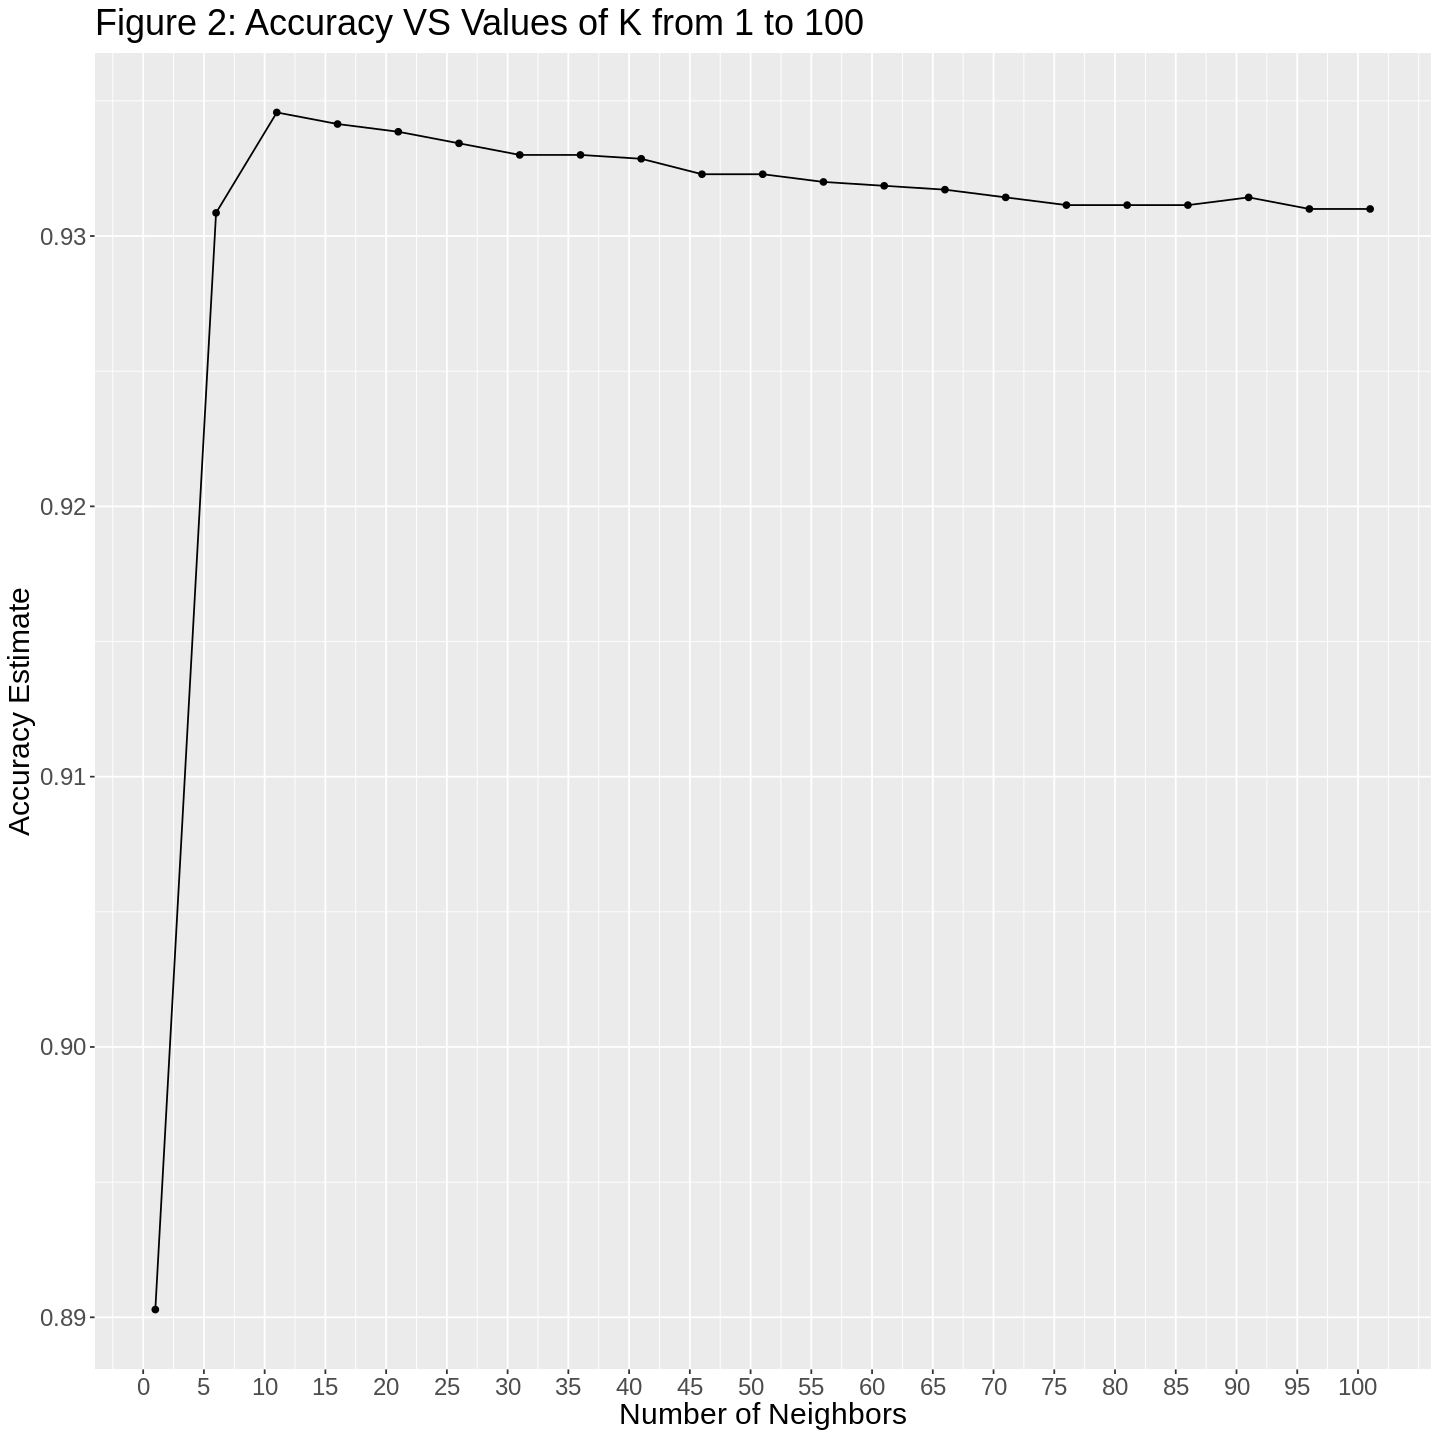

In [38]:
#Visualize the accuracy for each k value
options(repr.plot.width = 12, repr.plot.height = 12)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
                      geom_point() +
                      geom_line() +
                      labs(x = "Number of Neighbors", y = "Accuracy Estimate") +
                      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
                      theme(text = element_text(size = 18)) +
                      ggtitle("Figure 2: Accuracy VS Values of K from 1 to 100")
accuracy_versus_k

##### Figure 2. Graph showing the estimated accuracy (y-axis) of different number of neighbours (x-axis) which peaks around k = 11 with an estimated accuracy of 93%. 

From the plot, we can see that the k value which has the highest accuracy when it is between the value 10 and 15. To be more specific, we can arrange the accuracies in a descending order and slice the first row to obtain the best k value, as shown below.

In [39]:
#Setting the seed
set.seed(1)

#Obtaining the best k value
best_k <- accuracies %>%
            arrange(desc(mean)) %>%
            slice(1)
paste("Table 13: The Best K Value")
best_k

[1] "Table 13: The Best K Value"

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.9345715,5,0.002676536,Model03


Turns out that the best value for k is 11 and so, we will use k = 11 to train our model.

#### **III. Training The Model and Evaluating The Accuracy**

Now, we will train our model by combining the new model specification (`card_spec`) which uses the best value of k and the recipe (`card_recipe`) we have made into a workflow and fitting it into our training dataset.

In [40]:
#Setting the seed
set.seed(1)

#Creating the model specification using the best k value
card_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
            set_engine("kknn") %>%
            set_mode("classification")

#Fitting the model specification and recipe to the training dataset
card_fit <- workflow()%>%
            add_recipe(card_recipe)%>%
            add_model(card_spec) %>%
            fit(data = card_train)

Then, we will use our model to predict the fraud label of the testing dataset. To do this, we pass both the fit object (`card_fit`) and the testing dataset (`card_test`) into the `predict()` function and add the prediction column into the testing dataset using the `bind_cols()` function.

In [41]:
#Setting the seed
set.seed(1)

card_prediction <- predict(card_fit, card_test) %>%
                bind_cols(card_test)
paste("Table 14: The True and Predicted Labels of The Testing Dataset")
card_prediction

[1] "Table 14: The True and Predicted Labels of The Testing Dataset"

.pred_class,replicate,distance_from_home,ratio_to_median_purchase_price,fraud
<fct>,<int>,<dbl>,<dbl>,<fct>
FALSE,1,103.1251090,2.4083562,TRUE
FALSE,1,23.8983197,2.1449579,FALSE
FALSE,1,21.6935911,0.1124567,FALSE
TRUE,1,1.2267765,4.8817155,TRUE
FALSE,1,3.6786698,0.4227321,FALSE
FALSE,1,14.6868687,3.4621838,FALSE
TRUE,1,6.9817349,4.2306339,TRUE
FALSE,1,5.2648315,0.9523396,FALSE
TRUE,1,22.9012237,4.2301270,FALSE


Next, we will be evaluating the performance of our model by computing its accuracy and obtaining its confusion matrix, using the `metrics()` and `conf_mat()` functions, respectively.

In [42]:
#Computing the accuracy of the predictions
card_metrics <- card_prediction %>%
                metrics(truth = fraud , estimate = .pred_class) %>%
                filter(.metric == "accuracy")
paste("Table 15: The Accuracy of The Predictions of The Testing Dataset")
card_metrics

[1] "Table 15: The Accuracy of The Predictions of The Testing Dataset"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.924


In [43]:
#Obtaining the confusion matrix of the predictions
card_conf_mat <- card_prediction %>%
                    conf_mat(truth = fraud , estimate = .pred_class)
paste("Figure 3: The Confusion Matrix of The Predictions of The Testing Dataset")
card_conf_mat

[1] "Figure 3: The Confusion Matrix of The Predictions of The Testing Dataset"

          Truth
Prediction FALSE TRUE
     FALSE  1371  111
     TRUE    117 1401

##### Figure 3. The confusion matrix showing the number of transactions that are correctly predicted by the model as fraudulent and non-fraudulent transactions, as well as the number of fraudulent transactions that are mispredicted as non-fraudulent and non-fraudulent transactions that are mispredicted as fraudulent.

The result is that our model have an accuracy of 92%, where it correctly predicted 2772 data and falsely predicted 228 data.

#### **IV. Analysis**

To answer our research question and check whether the statement "we can expect to find that when the distance is within 100 km of the customer and the ratio of the purchased transaction to median purchase prices is 4 and below, it is unlikely that this transaction is a fraud" is true, we will create four new observation where the first observation (`new_obs_1`) have a distance and ratio that is outside the range we specified, while the second observation (`new_obs_2`) have a distance and ratio that are within the range. The other two observations are a mixed of the first and second observation.

To do this, we will use the fit object (`card_fit`) from before and pass it to the `predict()` function along with the new observations.

In [44]:
#Setting the seed
set.seed(1)

#The fit object
card_fit <- workflow()%>%
            add_recipe(card_recipe)%>%
            add_model(card_spec) %>%
            fit(data = card_train)

#Creating the first observation
new_obs_1 <- tibble(distance_from_home = 200, ratio_to_median_purchase_price = 50)

#Predicting the first observation 
new_prediction_1 <- predict(card_fit, new_obs_1)

paste("Table 16: The Predicted Label of New Observation 1")
new_prediction_1

[1] "Table 16: The Predicted Label of New Observation 1"

.pred_class
<fct>
TRUE


In [45]:
#Setting the seed
set.seed(1)

#Creating the second observation
new_obs_2 <- tibble(distance_from_home = 40, ratio_to_median_purchase_price = 2)

#Predicting the second observation 
new_prediction_2 <- predict(card_fit, new_obs_2)

paste("Table 17: The Predicted Label of New Observation 2")
new_prediction_2

[1] "Table 17: The Predicted Label of New Observation 2"

.pred_class
<fct>
FALSE


In [46]:
#Setting the seed
set.seed(1)

#Creating the second observation
new_obs_3 <- tibble(distance_from_home = 200, ratio_to_median_purchase_price = 2)

#Predicting the second observation 
new_prediction_3 <- predict(card_fit, new_obs_3)

paste("Table 18: The Predicted Label of New Observation 3")
new_prediction_3

[1] "Table 18: The Predicted Label of New Observation 3"

.pred_class
<fct>
TRUE


In [47]:
#Setting the seed
set.seed(1)

#Creating the second observation
new_obs_4 <- tibble(distance_from_home = 40, ratio_to_median_purchase_price = 50)

#Predicting the second observation 
new_prediction_4 <- predict(card_fit, new_obs_4)

paste("Table 19: The Predicted Label of New Observation 4")
new_prediction_4

[1] "Table 19: The Predicted Label of New Observation 4"

.pred_class
<fct>
TRUE


From the prediciton results, we can see that only `new_obs_2` is classified as a non-fraudulent transaction, while the other observations are considered fraudulent; which meet our expectation.


#### **V. Visualization**

To visualize how our model performed, we will create two plots based on the testing dataset, the first plot shows the true labels of the data points, while the second plot shows the predicted labels. Then, we will put them side by side so that it's easier to compare them.

Warning message:
“Removed 31 rows containing missing values (geom_point).”


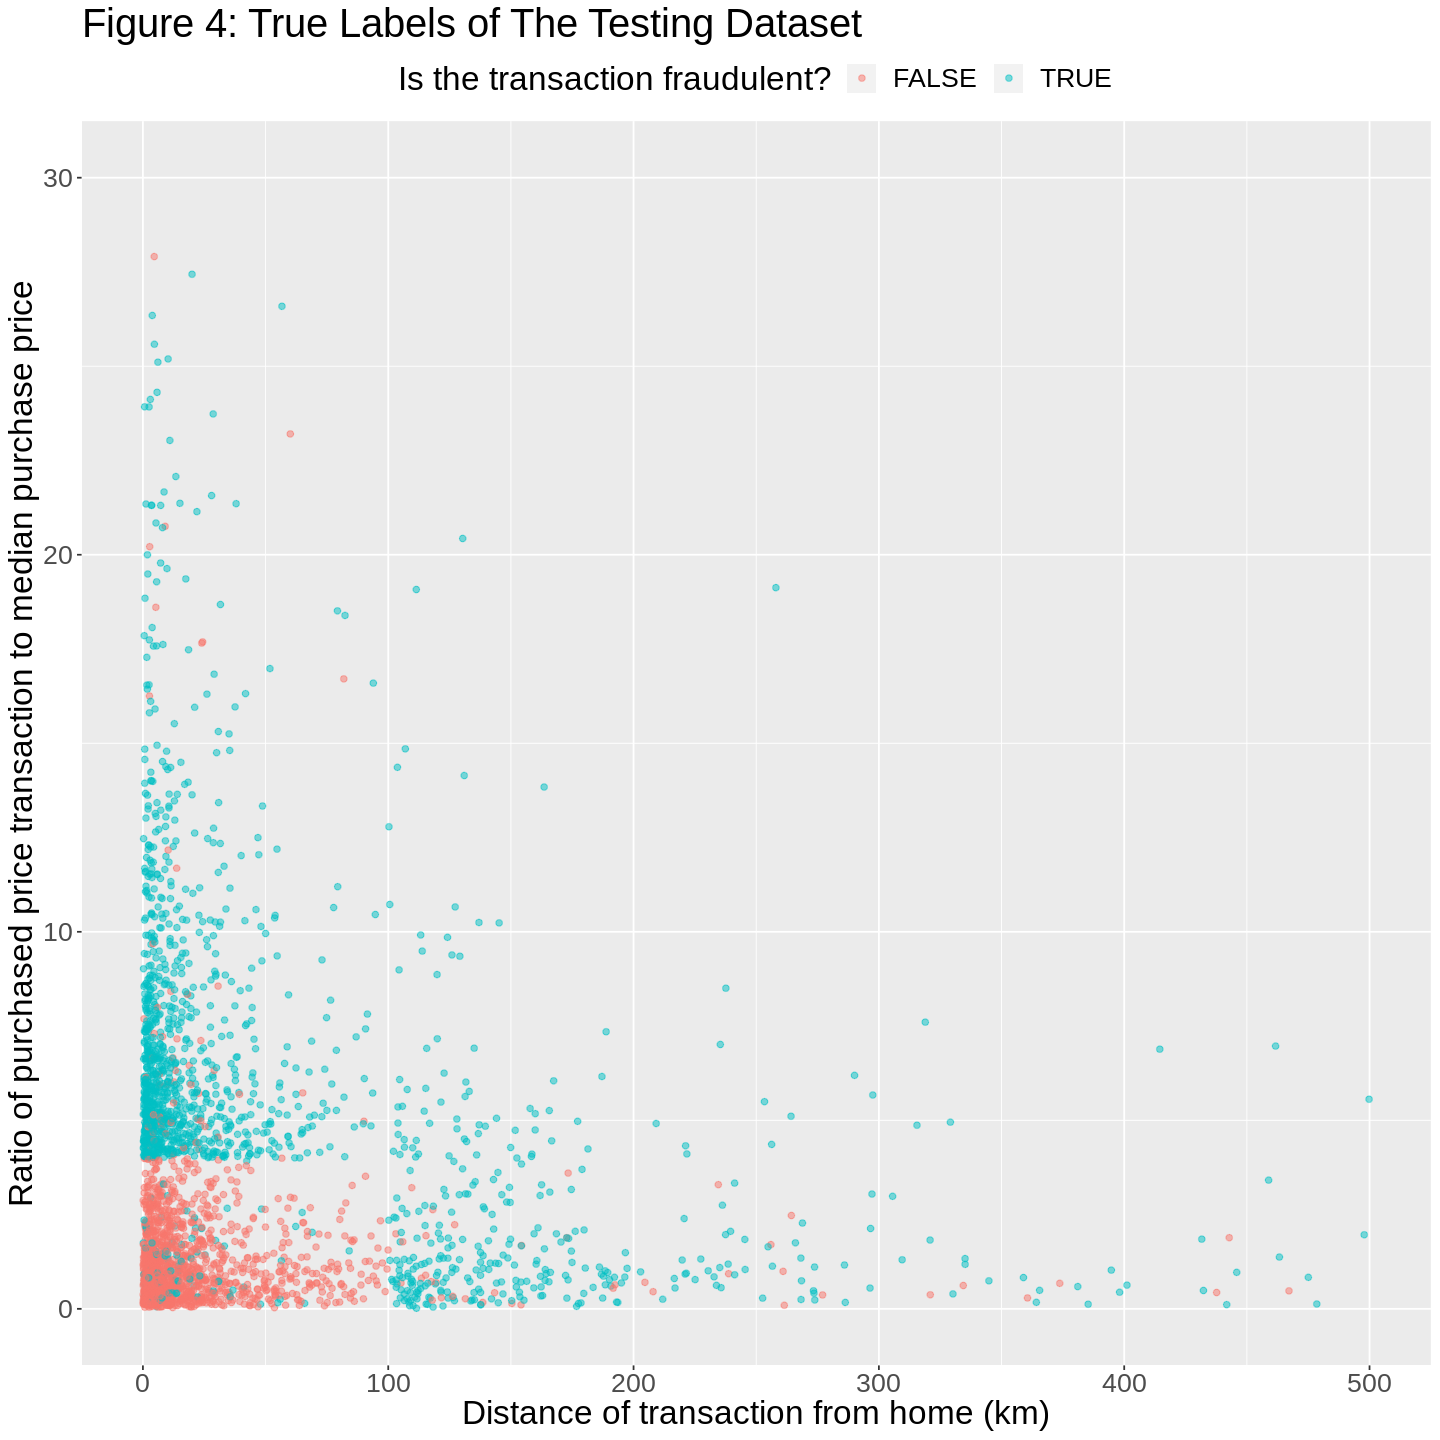

In [48]:
options(repr.plot.width = 12, repr.plot.height = 12)
card_test_true_plot <- card_prediction %>%
                       ggplot(aes(x = distance_from_home, y = ratio_to_median_purchase_price, colour = fraud)) + 
                       geom_point(alpha = 0.5) +
                       labs(x = "Distance of transaction from home (km)",
                            y = "Ratio of purchased price transaction to median purchase price",
                       colour = "Is the transaction fraudulent?") +
                       theme(text = element_text(size=20), legend.position="top") +
                       ggtitle("Figure 4: True Labels of The Testing Dataset") +
                       scale_y_continuous(limits = c(0, 30)) +
                       scale_x_continuous(limits = c(0, 500))
card_test_true_plot

##### Figure 4. Scatter plot showing the ratio of purchased price transaction to median purchase price based on distance of transaction location from home. Transactions are categorized into fraudulent (blue) and non-fraudulent (red) transactions based on the true labels from the “fraud” column of the testing dataset.

Warning message:
“Removed 31 rows containing missing values (geom_point).”


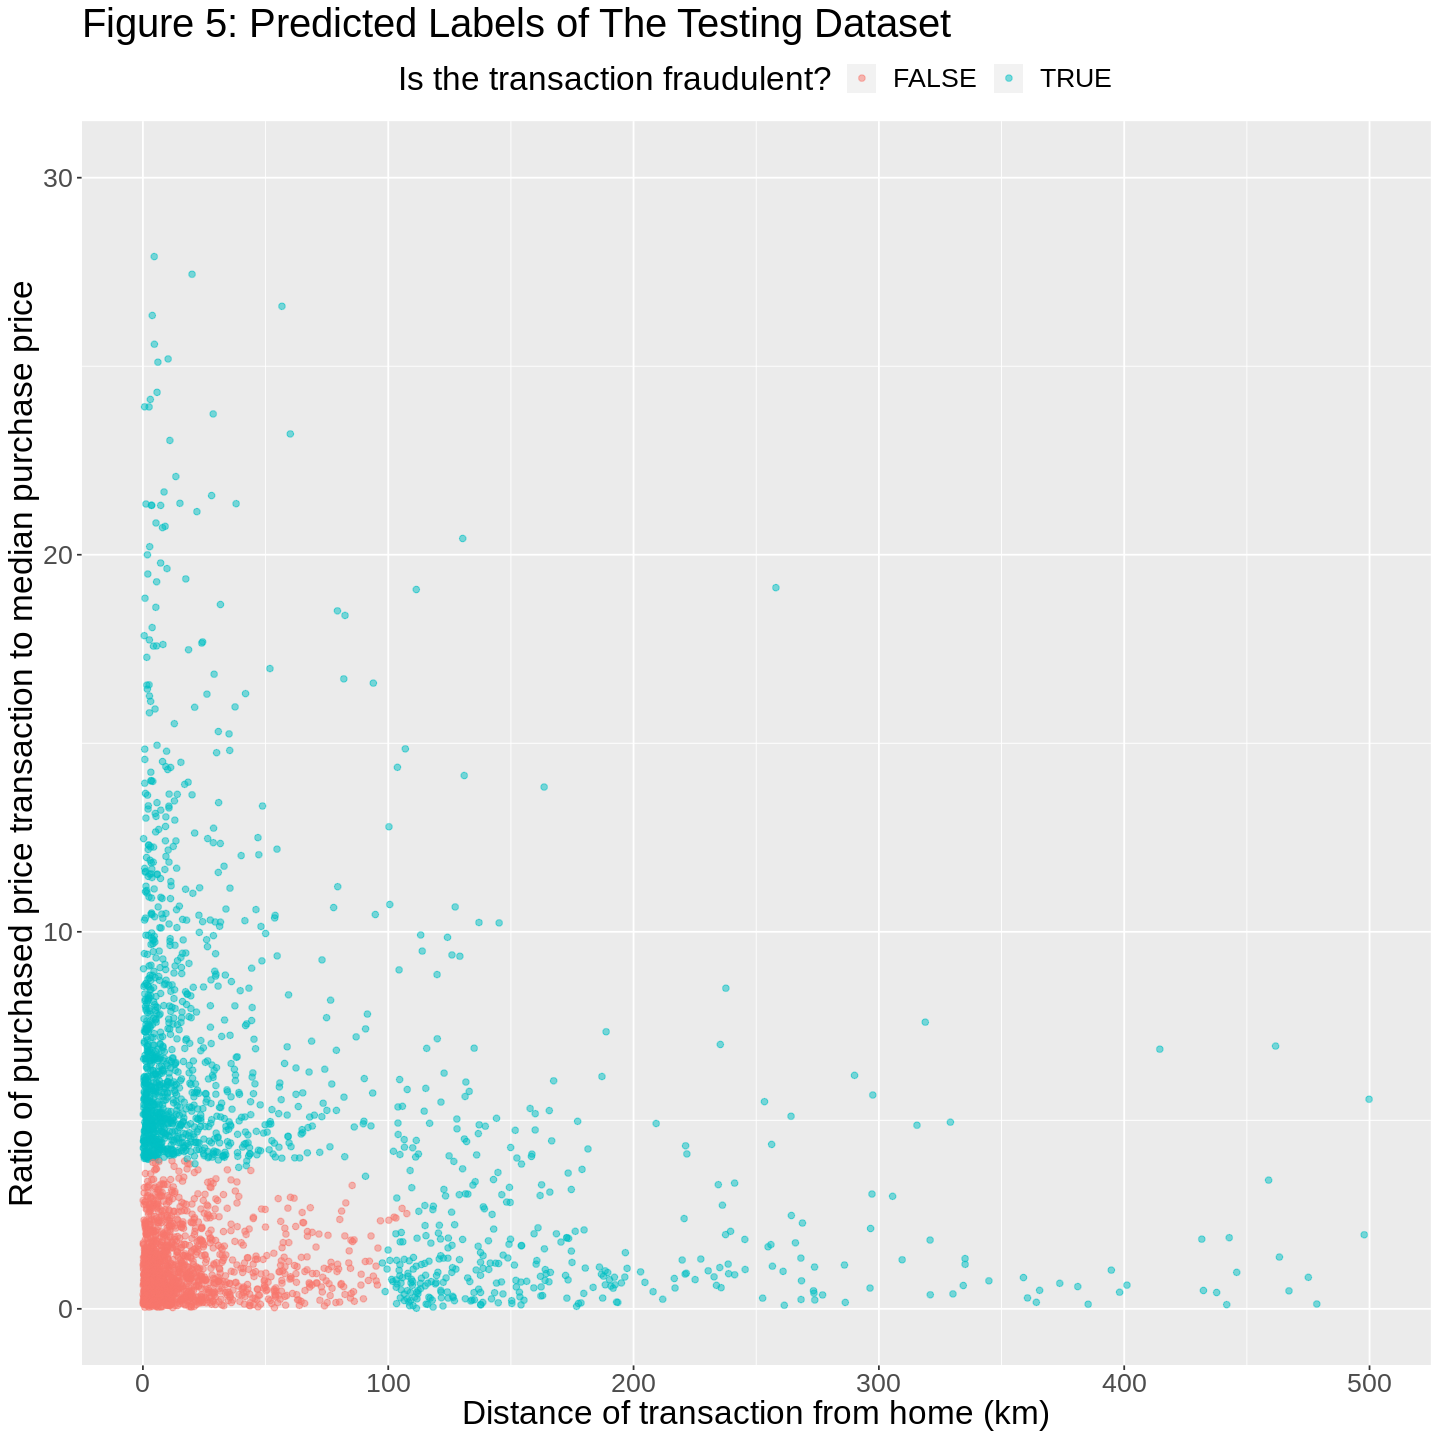

In [49]:
options(repr.plot.width = 12, repr.plot.height = 12)
card_test_predict_plot <- card_prediction %>%
                       ggplot(aes(x = distance_from_home, y = ratio_to_median_purchase_price, colour = .pred_class)) + 
                       geom_point(alpha = 0.5) +
                       labs(x = "Distance of transaction from home (km)",
                            y = "Ratio of purchased price transaction to median purchase price",
                       colour = "Is the transaction fraudulent?") +
                       theme(text = element_text(size=20), legend.position="top") +
                       ggtitle("Figure 5: Predicted Labels of The Testing Dataset") +
                       scale_y_continuous(limits = c(0, 30)) +
                       scale_x_continuous(limits = c(0, 500))
card_test_predict_plot

##### Figure 5. Scatter plot showing the ratio of purchased price transaction to median purchase price based on distance of transaction location from home. Transactions are categorized into fraudulent (blue) and non-fraudulent (red) transactions based on the predictions made by the model.

Warning message:
“Removed 31 rows containing missing values (geom_point).”
Warning message:
“Removed 31 rows containing missing values (geom_point).”


[1] "Figure 6: The Comparison Between The True and Predicted Labels of The Testing Dataset"

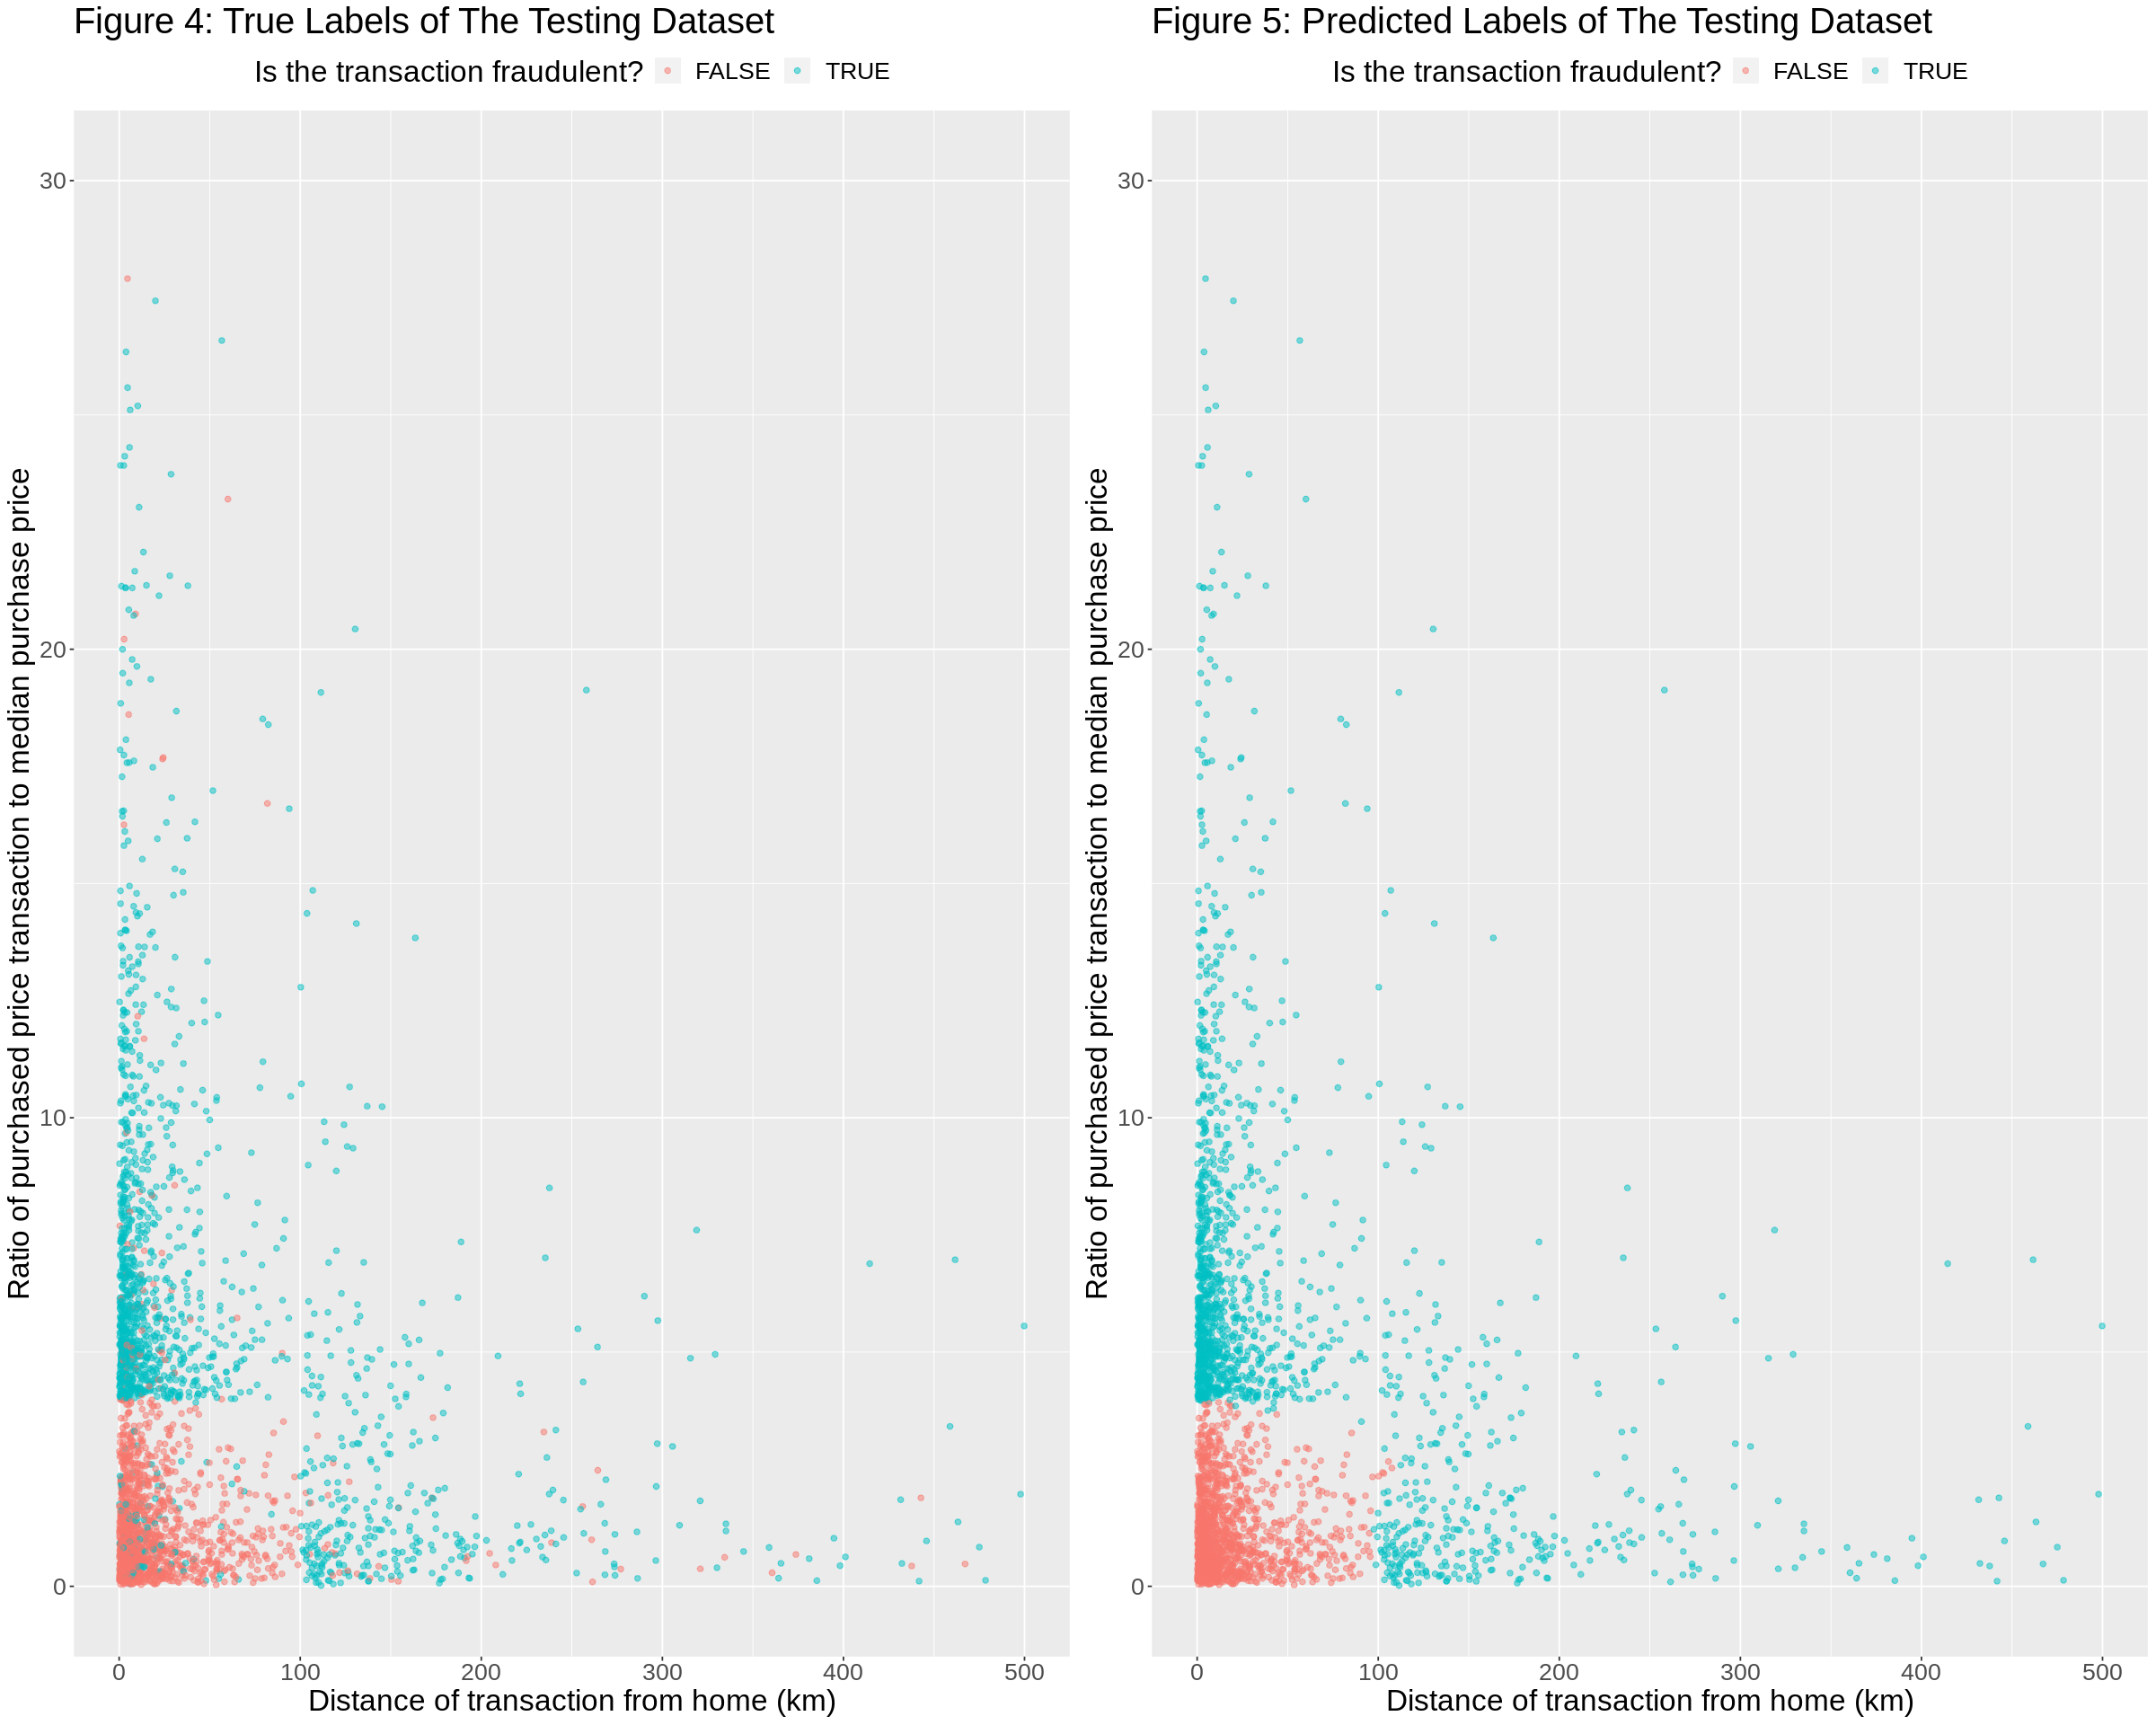

In [50]:
options(repr.plot.width = 20, repr.plot.height = 16)

comparison_plot <- plot_grid(card_test_true_plot, card_test_predict_plot, ncol = 2)

paste("Figure 6: The Comparison Between The True and Predicted Labels of The Testing Dataset")
comparison_plot

##### Figure 6. Graph showing the comparison between Figure 4 and Figure 5. The x-axis represents the distance of transaction from home in kilometres and the y-axis represents the ratio to the median purchase price. Transactions are categorized into fraudulent (blue) and non-fraudulent (red) transactions.

From Figure 6, we can see that in Figure 4 some fraudulent cases exist when the distance from home are below 100km and the ratio are below 4. However, in figure 5, we didn’t see the observation mentioned before, which means that our model made a generalization and will classify every data point that fall below the distance of 100km and the ratio of 4  as non-fraudulent.

Lastly, we will plot how our model generally classify the datapoints using a colored prediction map.

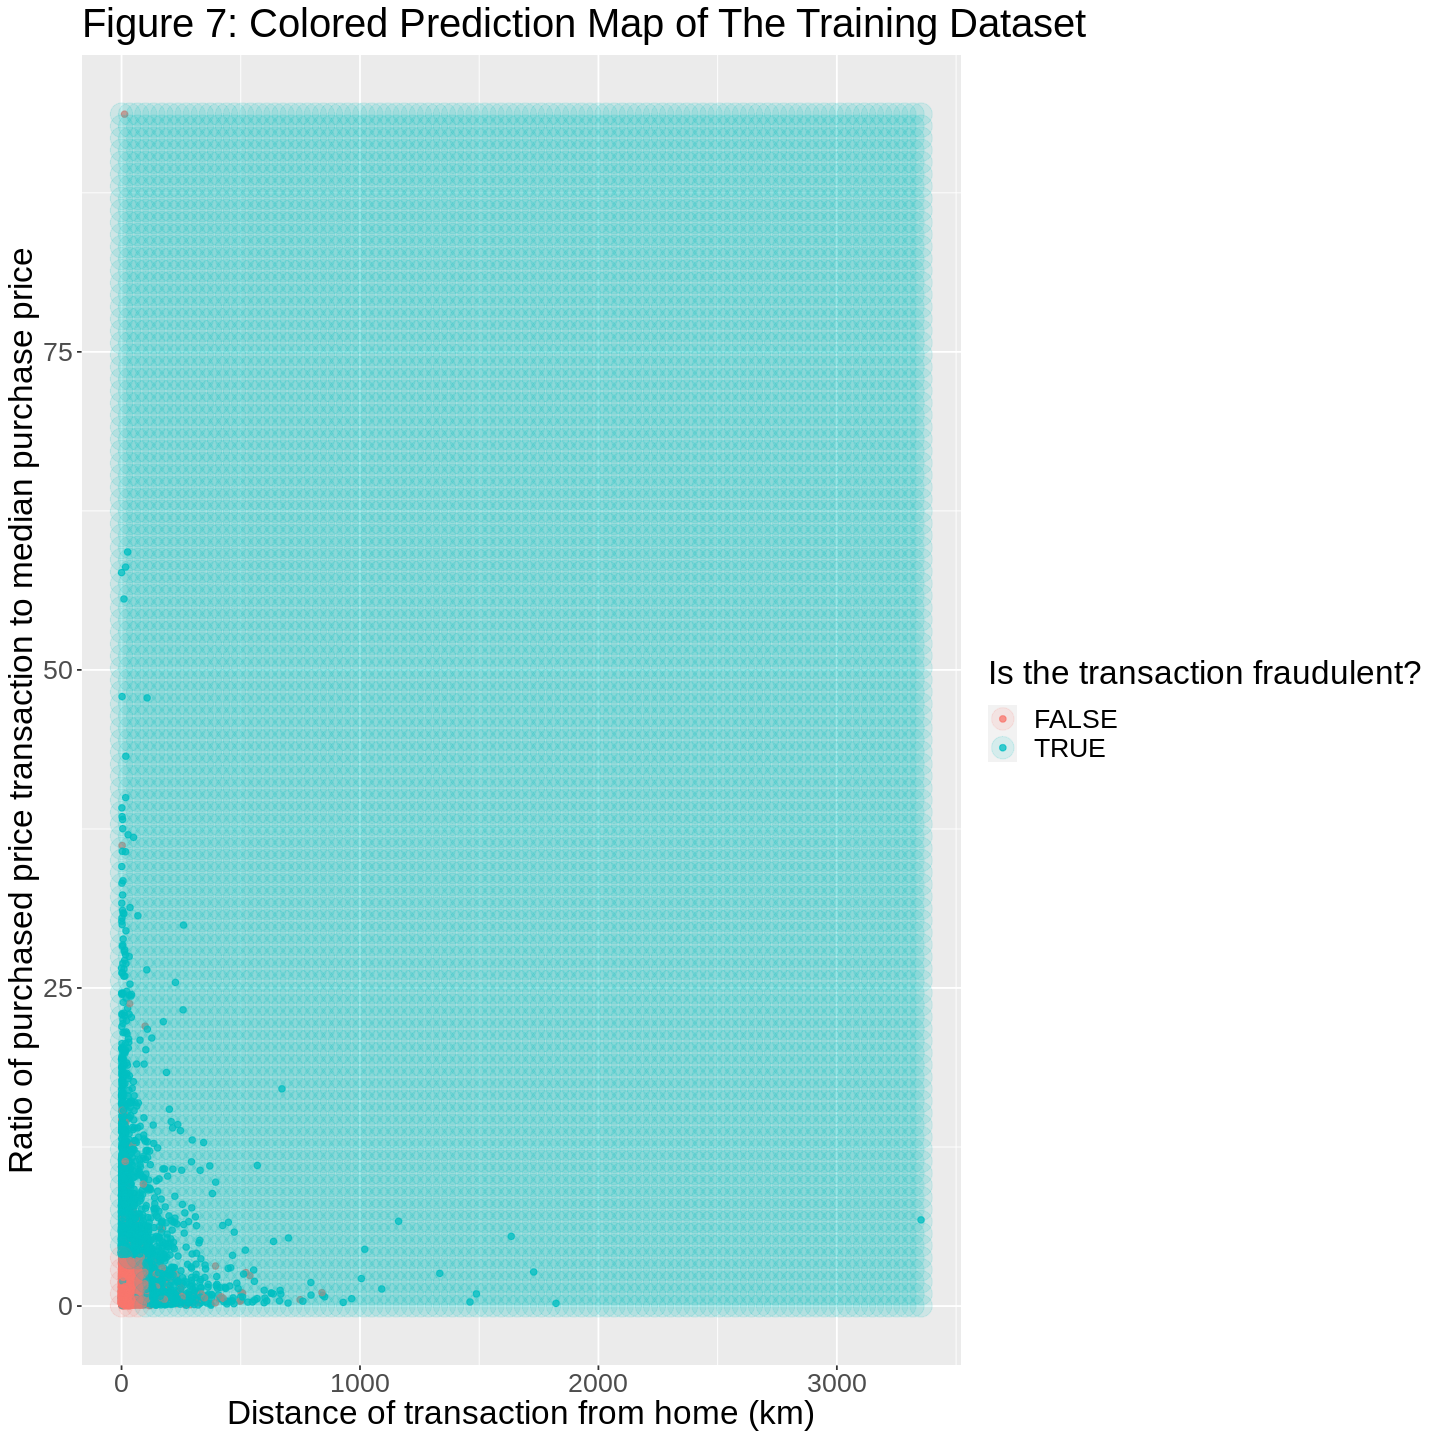

In [51]:
# Create the grid of distance from home/ratio to median purchase price values, and arrange in a data frame
distance_grid_train <- seq(min(card_train$distance_from_home), 
                           max(card_train$distance_from_home), 
                           length.out = 100)
ratio_grid_train <- seq(min(card_train$ratio_to_median_purchase_price), 
                        max(card_train$ratio_to_median_purchase_price), 
                        length.out = 100)
combined_grid_train <- as_tibble(expand.grid(distance_from_home = distance_grid_train, 
                                             ratio_to_median_purchase_price = ratio_grid_train))

# Use the fit workflow to make predictions at the grid points
knnPredGrid_train <- predict(card_fit, combined_grid_train)

# bind the predictions as a new column with the grid points
prediction_table_train <- bind_cols(knnPredGrid_train, combined_grid_train) %>%
                          rename(Class = .pred_class)

#Setting the plot size
options(repr.plot.width = 12, repr.plot.height =12)

# Plot:
# 1. The colored scatter of the training dataset
# 2. The faded colored scatter for the grid points (predictions)
model_plot <- ggplot() +
              geom_point(data = card_train, 
                         mapping = aes(x = distance_from_home, 
                                       y = ratio_to_median_purchase_price, 
                                       color = fraud), 
                         alpha = 0.75) +
              geom_point(data = prediction_table_train, 
                         mapping = aes(x = distance_from_home, 
                                       y = ratio_to_median_purchase_price, 
                                       color = Class), 
                         alpha = 0.12, 
                         size = 6) +
              labs(color = "Is the transaction fraudulent?", 
                   x = "Distance of transaction from home (km)", 
                   y = "Ratio of purchased price transaction to median purchase price") +
              theme(text = element_text(size = 20)) +
              ggtitle("Figure 7: Colored Prediction Map of The Training Dataset")
model_plot

##### Figure 7. Coloured prediciton map overlaid by scatter plot showing how the model classifies the data points in general. The background color of each area of our scatter plot correspond to the decision that the classifier would make; blue for fraudulent and red for non-fraudulent. The data points are colored in blue (fraudulent) and red (non-fraudulent).

Warning message:
“Removed 146 rows containing missing values (geom_point).”
Warning message:
“Removed 9670 rows containing missing values (geom_point).”


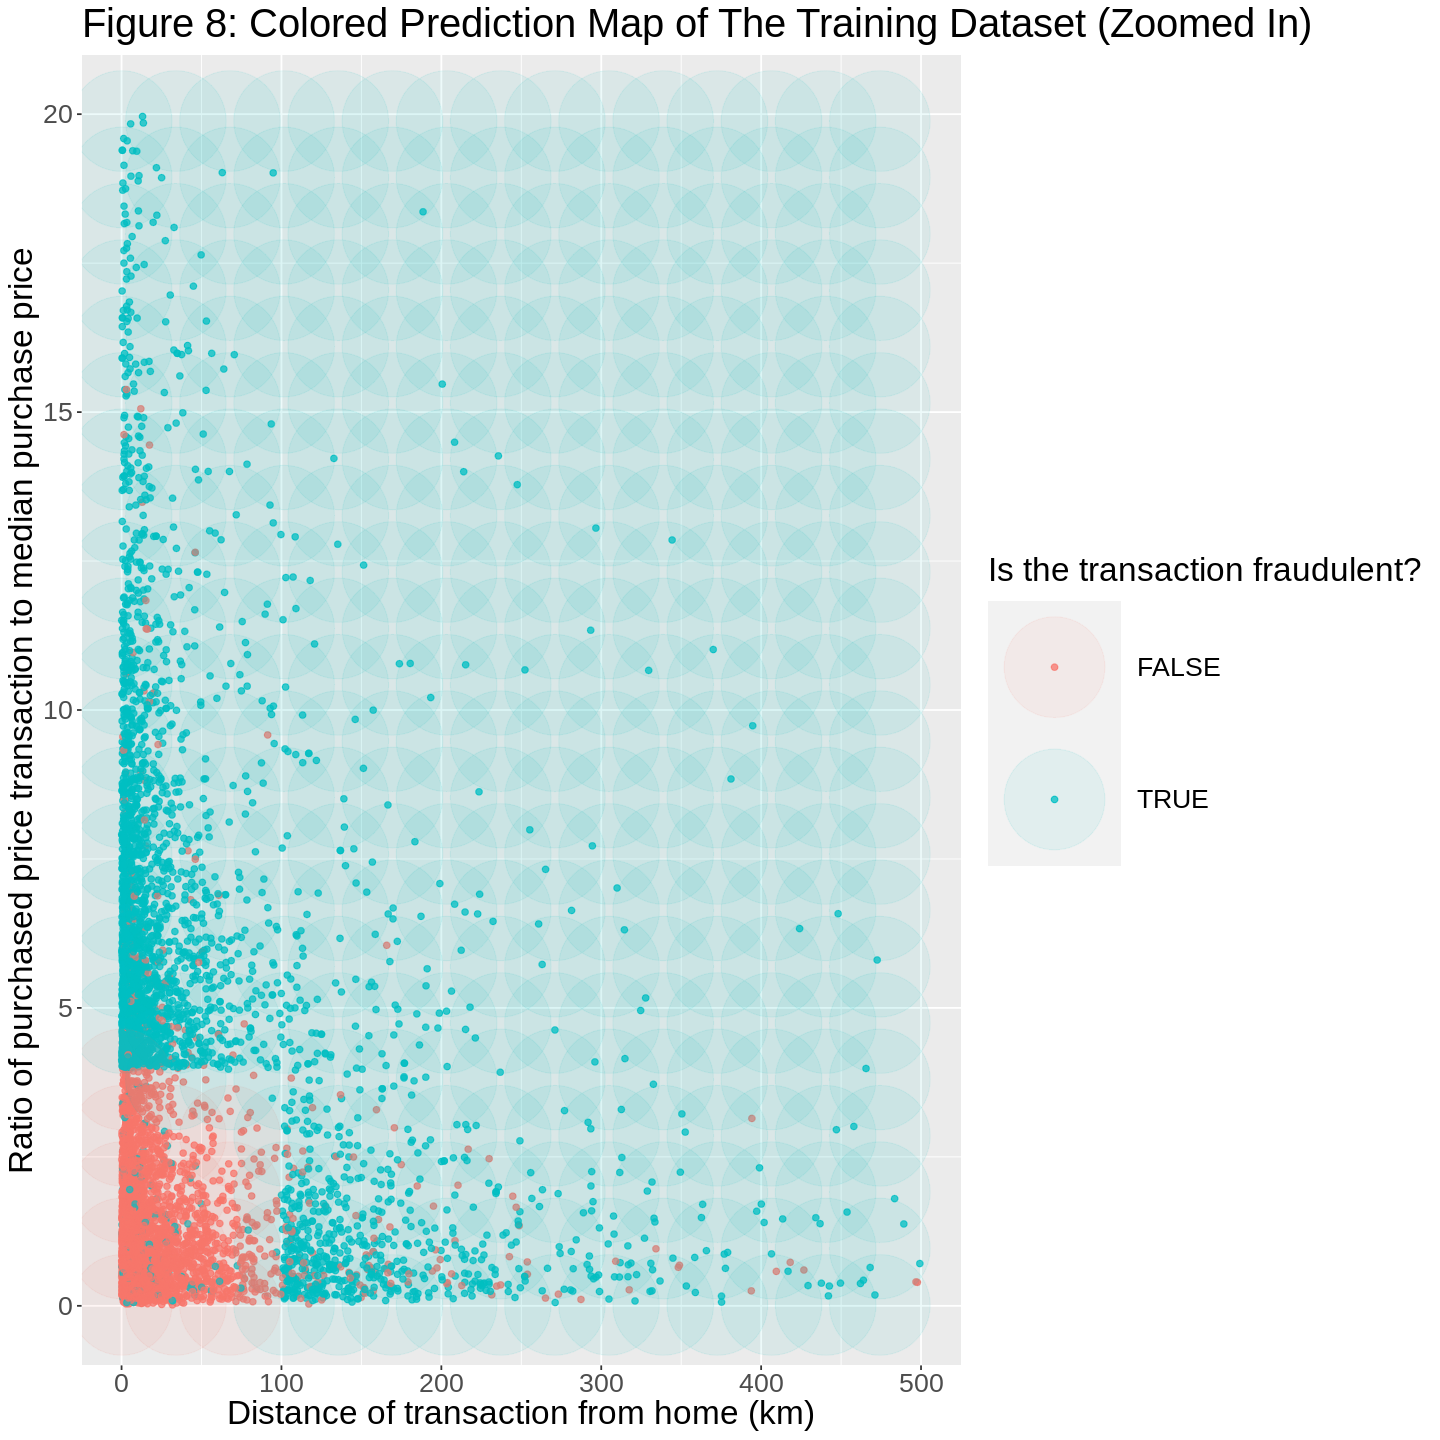

In [56]:
#Setting the plot size
options(repr.plot.width = 12, repr.plot.height =12)

#Zooming in to the area where most data points are located
zoomed_in_model_plot <-  ggplot() +
                          geom_point(data = card_train, 
                                     mapping = aes(x = distance_from_home, 
                                                   y = ratio_to_median_purchase_price, 
                                                   color = fraud), 
                                     alpha = 0.75) +
                          geom_point(data = prediction_table_train, 
                                     mapping = aes(x = distance_from_home, 
                                                   y = ratio_to_median_purchase_price, 
                                                   color = Class), 
                                     alpha = 0.07, 
                                     size = 28) +
                          labs(color = "Is the transaction fraudulent?", 
                               x = "Distance of transaction from home (km)", 
                               y = "Ratio of purchased price transaction to median purchase price") +
                          theme(text = element_text(size = 20)) +
                          scale_y_continuous(limits = c(0, 20)) +
                          scale_x_continuous(limits = c(0, 500)) +
                          ggtitle("Figure 8: Colored Prediction Map of The Training Dataset (Zoomed In)")
zoomed_in_model_plot

##### Figure 8. Coloured prediciton map overlaid by scatter plot showing a more close-up look on how the model classifies the data points in general. The color of data points corresponds to the true label of the transactions and the background color of each area of our scatter plot correspond to the decision that the classifier would make; blue for fraudulent and red for non-fraudulent.

## **Discussion**
 
**Summary of what we found**
 
After performing the analysis of our dataset, we found that:
From computing the correlation value of all variables with respect to fraud, distance_from_home and ratio_to_median_purchase_price variables are the most relevant predictors. Thus, we used those two variables in constructing our model. In our original dataset, 91.25% of the transactions were not fraudulent, which implied that our dataset was unbalanced as seen in *Table 5*. Therefore, we upsampled our dataset and the result is that 50% of the transactions were not fraudulent an the other 50% were fraudulent transactions.
Our dataset contained 1,000,000 data points which was too large to be processed using Jupyter, and so, we decided to sample 10,000 data from our original dataset and use that as our primary dataset for the analysis.
After performing 5-fold cross validation and tuning the parameter, we found that the best k value for our model is k = 11 (as seen in *Figure 2* and *Table 13*). Using K=11, our model has an accuracy of around 92.4% (as seen in *Table 15*), where it correctly predicted 2772 data and falsely predicted 228 data (*Figure 3*). The conclusion from our model indicates that most non-fraudulent transactions are likely to be within 100 km (Distance of transactions from home) and have a ratio of 4 or below (purchased price/median purchase price) as it is modelled in *Figure 7*.
 

**What we expected and did not expected to find**

From our preliminary analysis, we expected to find that purchases were more likely to be fraudulent when distances were over 100km (Distance of transactions from home) and when the ratio was over 4 (purchased price/median purchase price), while non-fraudulent purchases were more common within 100 km (Distance of transactions from home) and the price was under ratio of 4 (purchased price/median purchase price). As mentioned above, this is exactly what our prediction model reflects for both training and testing data sets and correlates with actual data points.

However, there are also limitations of our model, since in the raw data set, there are still fairly decent chances that transaction under ratio of 4 (purchased price/median purchase price) but over 100 km (Distance of transactions from home) will yield non-fraudulent results as seen in *Figure 1*. However, using the model, it unilaterally predicts all transactions in those regions as fraudulent.


**The impacts of our findings**
 
Our findings could dictate and influence consumer decisions when purchasing items from vendors both online and offline and help algorithm and moderators of online and offline shopping platforms to identify potential fraudulent vendors.
For example companies may utilise the data to decrease the chance of reimbursing the money back to the victim of fraud and increase the revenue. Overall, it can also contribute to reducing the risk of credit card fraud, prevent future fraudulent cases and make transactions more secure saving both consumers and e-commerce time and money.
 
 
**Future questions that this could lead to**
 
This could lead to discovering the rationale behind why it is more likely that a vendor to be fraudulent on higher price items when further away from the customers' home. Whether it is because more customers are more likely to purchase from fraudulent vendors that sell expensive merchandise or because vendors are less likely to be caught when they are further away from their victim's place of residence that causes the phenomenon we observe.  Another area of research that could be prompted by this research is that we could discover the patterns of fraudulent transactions, develop better security systems to protect consumers from bad vendors and effectively signalling systems for honest vendors who want to attract customers.



## **References**

Citations of literature

    1. Timbers, T., Campbell, T., & Lee, M. (2022). Data science: A first introduction. CRC Press.

    2. Team, R. C. (2013). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. http://www. R-project. org/.

Citation of dataset

    1. The Dataset is sourced by some unnamed institute and can be found on the Kaggle website by using the URL https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud